<a href="https://colab.research.google.com/github/AnamarijaKozina/Duboko-ucenje-FER/blob/main/fcann2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [14]:
W1 = np.random.randn(5,4)

print(W1, np.sum(np.square(W1)))

[[-0.12397704  0.19072851 -1.19449029  1.60006235]
 [ 0.03034095  0.79741515 -1.69141624  0.18864899]
 [-0.53753902  1.18086752 -0.61283947  0.06771082]
 [-0.80731712 -0.16578194 -0.90964037 -0.79326307]
 [-1.38071781 -1.17836855  0.76838023 -0.60754502]] 16.02598610366417


In [28]:
def Loss(y_true, y_pred, W1, W2, param_lambda):
  N, _ = y_pred.shape
  logvalues = y_pred[range(N), y_true]
  loss = -np.sum(logvalues) * (1/len(y_true))
  #reg = param_lambda * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
  return loss 

In [23]:
def fcann2_train(x, y_, n_iter, param_delta):
  N, dim = x.shape
  n_classes = max(y_) + 1

  n_inputs = dim
  n_hidden = 5
  n_outputs =n_classes

  W1 = np.random.randn(n_hidden, n_inputs)
  b1 = np.zeros((n_hidden, 1))
  W2 = np.random.randn(n_outputs, n_hidden)
  b2 = np.zeros((n_outputs, 1))

  #model = fcann2(dim, 5, n_classes)
  for i in range(n_iter):
    #scores = model.forward(train_x)

    s1 = np.transpose(np.dot(W1, np.transpose(x)) + b1) # h x N
    # x.shape = N x hid
    h1 = np.maximum(s1,0) # h x N
    s2 = np.transpose(np.dot(W2, np.transpose(h1)) + b2) # c x N
    scores = s2 # N x n_outputs/n_classes --> NxC

    expscores = np.exp(scores) # N x C
    
    # nazivnik sofmaksa
    sumexp = np.transpose(expscores.sum(1)).reshape((N,1))  # N x 1

    # logaritmirane vjerojatnosti razreda 
    probs = expscores / sumexp     # N x C   ---> ovo je P u zadatku
    logprobs = np.log(probs)  # N x C   

    # gubitak
    loss  = Loss(y_, logprobs, W1, W2, 0.5)   # scalar
    
    # dijagnostički ispis
    if i % 5000 == 0:
      print("iteration {}: loss {}".format(i, loss))

    Y = np.zeros((N, n_classes))
    Y[range(N), y_] = 1
    Gs2 = probs - Y # N x C
    grad_W2 = np.dot(np.transpose(Gs2), h1)    # --> C x H
    grad_b2 = np.transpose(np.sum(Gs2, axis=0)).reshape(b2.shape)    # --> C x 1
    Gh1 = np.dot(Gs2, W2) # n x hid
    Gs1 = Gh1 * (h1>0) # N x H 
    grad_W1 = np.dot(np.transpose(Gs1), x)   # H x dim
    grad_b1 = np.transpose(np.sum(Gs1, axis=0)).reshape(b1.shape)   # H x 1

    # poboljšani parametri
    W1 += -param_delta * grad_W1
    b1 += -param_delta * grad_b1
    W2 += -param_delta * grad_W2
    b2 += -param_delta * grad_b2

  return W1, W2, b1, b2

In [24]:
def fcann2_classify(x):
  N = x.shape[0]
  s1 = np.transpose(np.dot(W1, np.transpose(x)) + b1) # h x N
  h1 = np.maximum(s1,0) # h x N
  s2 = np.transpose(np.dot(W2, np.transpose(h1)) + b2) # c x N
  scores = s2 # --> NxC
  expscores = np.exp(scores) # N x C
  sumexp = np.transpose(expscores.sum(1)).reshape((N,1))  # N x 1
  probs = expscores / sumexp     # N x C

  return np.argmax(probs, axis=1)

In [25]:
list = [
        [0.33,0.24,0.36],
        [0.1, 0.56, 0.98],
        [0.57,0.12,0.13]
]
probs = np.array(list)
np.argmax(probs, axis=1)

array([2, 2, 0])

In [26]:
import matplotlib.pyplot as plt
import random

class Random2DGaussian:
  """Random bivariate normal distribution sampler

  Hardwired parameters:
      d0min,d0max: horizontal range for the mean
      d1min,d1max: vertical range for the mean
      scalecov: controls the covariance range 

  Methods:
      __init__: creates a new distribution

      get_sample(n): samples n datapoints

  """

  d0min=0 
  d0max=10
  d1min=0 
  d1max=10
  scalecov=5
  
  def __init__(self):
    dw0,dw1 = self.d0max-self.d0min, self.d1max-self.d1min
    mean = (self.d0min,self.d1min)
    mean += np.random.random_sample(2)*(dw0, dw1)
    eigvals = np.random.random_sample(2)
    eigvals *= (dw0/self.scalecov, dw1/self.scalecov)
    eigvals **= 2
    theta = np.random.random_sample()*np.pi*2
    R = [[np.cos(theta), -np.sin(theta)], 
         [np.sin(theta), np.cos(theta)]]
    Sigma = np.dot(np.dot(np.transpose(R), np.diag(eigvals)), R)
    self.get_sample = lambda n: np.random.multivariate_normal(mean,Sigma,n)

  
def graph_surface(function, rect, offset=0.5, width=800, height=800):
  """Creates a surface plot (visualize with plt.show)

  Arguments:
    function: surface to be plotted
    rect:     function domain provided as:
              ([x_min,y_min], [x_max,y_max])
    offset:   the level plotted as a contour plot

  Returns:
    None
  """
  '''
  (65536,)
  (256, 256) (256, 256)
  (65536, 2)
  '''

  lsw = np.linspace(rect[0][1], rect[1][1], width) # returns width=256 numbers evenly spaced between miny and maxy
  lsh = np.linspace(rect[0][0], rect[1][0], height) # same for x
  xx0,xx1 = np.meshgrid(lsh, lsw)
  r = xx0.flatten()
  print(r.shape)
  grid = np.stack((xx0.flatten(),xx1.flatten()), axis=1)
  print(xx0.shape, xx1.shape)
  #get the values and reshape them
  print(grid.shape)
  print(function(grid).shape)
  values=function(grid).reshape((width,height))
  
  # fix the range and offset
  delta = offset if offset else 0
  maxval=max(np.max(values)-delta, - (np.min(values)-delta))
  
  # draw the surface and the offset
  plt.pcolormesh(xx0, xx1, values, vmin=delta-maxval, vmax=delta+maxval)
    
  if offset != None:
    plt.contour(xx0, xx1, values, colors='black', levels=[offset])

def graph_data(X,Y_, Y, special=[]):
  """Creates a scatter plot (visualize with plt.show)

  Arguments:
      X:       datapoints
      Y_:      groundtruth classification indices
      Y:       predicted class indices
      special: use this to emphasize some points

  Returns:
      None
  """
  # colors of the datapoint markers
  palette=([0.5,0.5,0.5], [1,1,1], [0.2,0.2,0.2])
  colors = np.tile([1.0,0.0,0.0], (Y_.shape[0],1))
  for i in range(len(palette)):
    colors[Y_==i] = palette[i]

  # sizes of the datapoint markers
  sizes = np.repeat(20, len(Y_))
  sizes[special] = 40
  
  # draw the correctly classified datapoints
  good = (Y_==Y)
  plt.scatter(X[good,0],X[good,1], c=colors[good], 
              s=sizes[good], marker='o', edgecolors='black')

  # draw the incorrectly classified datapoints
  bad = (Y_!=Y)
  plt.scatter(X[bad,0],X[bad,1], c=colors[bad], 
              s=sizes[bad], marker='s', edgecolors='black')


def sample_gauss_2d(nclasses, nsamples):
  # create the distributions and groundtruth labels
  Gs=[]
  Ys=[]
  for i in range(nclasses):
    Gs.append(Random2DGaussian())
    Ys.append(i)

  # sample the dataset
  X = np.vstack([G.get_sample(nsamples) for G in Gs])
  Y_= np.hstack([[Y]*nsamples for Y in Ys])
  
  return X,Y_

def sample_gmm_2d(ncomponents, nclasses, nsamples):
  # create the distributions and groundtruth labels
  Gs=[]
  Ys=[]
  for i in range(ncomponents):
    Gs.append(Random2DGaussian())
    Ys.append(np.random.randint(nclasses))

  # sample the dataset
  X = np.vstack([G.get_sample(nsamples) for G in Gs])
  Y_= np.hstack([[Y]*nsamples for Y in Ys])
  
  return X,Y_

iteration 0: loss 5.821110568218408
iteration 5000: loss 0.21206499475573853
(640000,)
(800, 800) (800, 800)
(640000, 2)
(640000,)


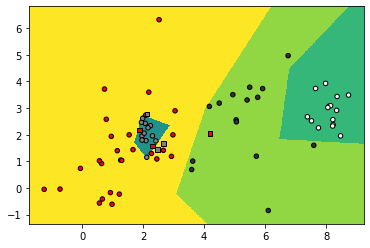

In [27]:
np.random.seed(100)
  
  # get data
X,Y_ = sample_gmm_2d(5,4,15)
  # X,Y_ = sample_gauss_2d(2, 100)

W1, W2, b1, b2 = fcann2_train(X, Y_, 10000, 0.001)
  # get the class predictions
Y = fcann2_classify(X)

  # graph the decision surface
rect=(np.min(X, axis=0)-0.5, np.max(X, axis=0)+0.5)

graph_surface(fcann2_classify, rect, offset=None)
  
  # graph the data points
graph_data(X, Y_, Y, special=[])

plt.show()